In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("magazine_reviews_cleanup.tsv", sep='\t')
df

,rating,vote,verified,reviewTime,reviewerName,reviewText,summary
0,5,0,True,"07 14, 2014",Alvey,great read every issue,Five Stars
1,3,0,True,"06 24, 2014",Jeff A Milne,magazine great time technology magazine new st...,Great While it lasted
2,5,0,True,"06 1, 2014",P. R THOMPSON,ive read maximum pc mpc many year article tech...,For Both the Newbie and The Advanced PC User
3,5,0,True,"05 15, 2014",Earle Williams,order magazine grandson then 7 go 30 wasis dep...,Great Gift
4,4,0,True,"03 28, 2014",JJM,subscribed nook version year thoroughly enjoy ...,Decent magazine at a good price
...,...,...,...,...,...,...,...
58649,5,0,True,"08 16, 2016",Katie Reid,nice surprise boyfriend really enjoy olympics ...,Quick Delivery
58650,1,0,True,"08 10, 2016",John,magazine look like print recycle shoe rubber b...,One Star
58651,5,0,True,"07 31, 2016",Jeff Johnson,cant go wrong si subscription pleased,great magazine
58652,5,0,True,"10 5, 2017",David Lashaway,magazine far time favorite one metal detect li...,Favorite metal detecting magazine


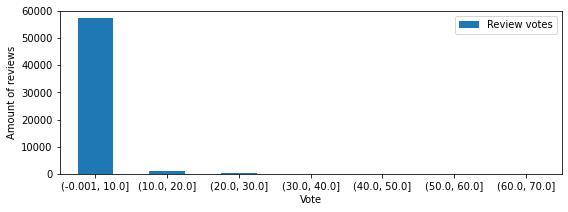

In [3]:
bins = list(range(0, 50+25, 10))
df["vote"].value_counts(bins=bins).plot(figsize=(9, 3),kind="bar", rot=0)
plt.ylabel("Amount of reviews")
plt.xlabel("Vote")
plt.legend(["Review votes"])

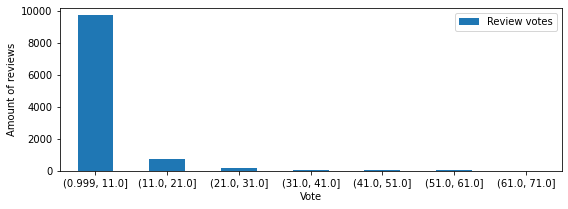

In [4]:
bins = list(range(1, 50+25, 10))
df["vote"].value_counts(bins=bins).plot(figsize=(9, 3),kind="bar", rot=0)
plt.ylabel("Amount of reviews")
plt.xlabel("Vote")
plt.legend(["Review votes"])

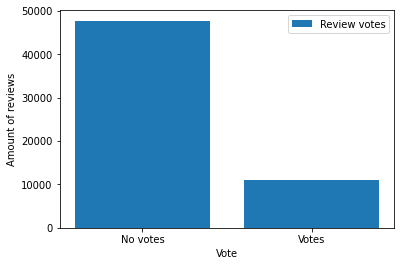

In [5]:
votes = df["vote"].value_counts()
no_votes = votes[0].sum()
has_votes = votes[1:].sum()
plt.bar(["No votes", "Votes"], [no_votes, has_votes])
plt.ylabel("Amount of reviews")
plt.xlabel("Vote")

plt.legend(["Review votes"])

In [6]:
bins = list(range(1, 50+25, 10))  # [1, 11, 21, 31, 41, 51, 61, 71]

def split_by_ratings(data: pd.DataFrame) -> list[list]:
    split_data = []
    for rating in range(5, 0, -1):
        single_rating_votes = df.loc[df.rating == rating]["vote"]
        binned = single_rating_votes.value_counts(bins=bins)
        split_data.append(binned.to_list())
    return split_data

split_by_ratings(df)

[[4607, 258, 54, 32, 10, 8, 3],
 [1256, 78, 23, 8, 4, 1, 0],
 [1057, 89, 29, 9, 5, 4, 4],
 [852, 95, 19, 8, 6, 3, 1],
 [1944, 233, 80, 27, 26, 9, 7]]

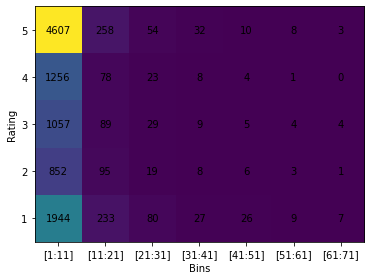

In [7]:
heatmap = np.array(split_by_ratings(df))

bin_labels = ["[1:11]", "[11:21]", "[21:31]", "[31:41]","[41:51]", "[51:61]", "[61:71]"]
rating_labels = range(5, 0, -1)

fig,ax = plt.subplots()
im = ax.imshow(heatmap)
ax.set_yticks(range(len(rating_labels)), lables="rating")
ax.set_xticks(range(len(bin_labels)), lables="bins")
ax.set_ylabel("Rating")
ax.set_xlabel("Bins")
ax.set_xticklabels(bin_labels)
ax.set_yticklabels(rating_labels)

for i in range(5):
    for j in range(len(bins)-1):
        text = ax.text(j, i, heatmap[i, j], ha="center", va="center")

fig.tight_layout()
plt.show()

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("data/cleaned_reviews.tsv", sep="\t")
df

,rating,vote,verified,reviewTime,reviewerName,reviewText,summary
0,5,0,True,"07 14, 2014",Alvey,great read every issue,Five Stars
1,3,0,True,"06 24, 2014",Jeff A Milne,magazine great time technology magazine new st...,Great While it lasted
2,5,0,True,"06 1, 2014",P. R THOMPSON,ive read maximum pc mpc many year article tech...,For Both the Newbie and The Advanced PC User
3,5,0,True,"05 15, 2014",Earle Williams,order magazine grandson then 7 go 30 wasis dep...,Great Gift
4,4,0,True,"03 28, 2014",JJM,subscribed nook version year thoroughly enjoy ...,Decent magazine at a good price
...,...,...,...,...,...,...,...
2374,5,0,True,"04 10, 2013",Sami Smile,friend want ukulele could learn amanda palmer ...,Great Gift
2375,2,0,True,"04 9, 2013",Vicki K.,feel terrible 2 star put ukulele hold tune way...,Will not hold a tune
2376,4,0,True,"04 7, 2013",Allison,great package deal great time learn uke remind...,Fun Fun Fun
2377,5,0,True,"03 28, 2013",Erin Dashnaw,book much help past chord fingering uke great ...,just what I ordered!


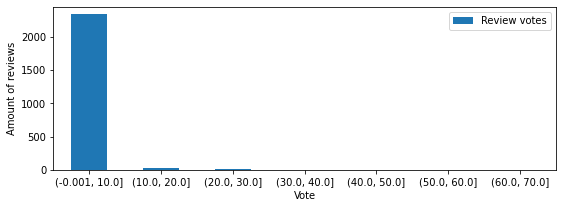

In [10]:
bins = list(range(0, 50 + 25, 10))
df["vote"].value_counts(bins=bins).plot(figsize=(9, 3), kind="bar", rot=0)
plt.ylabel("Amount of reviews")
plt.xlabel("Vote")
plt.legend(["Review votes"])

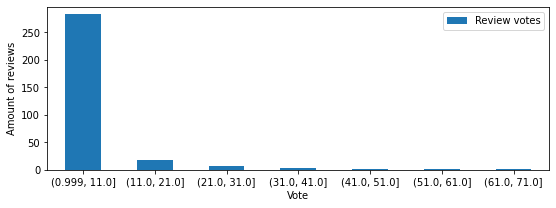

In [11]:
bins = list(range(1, 50 + 25, 10))
df["vote"].value_counts(bins=bins).plot(figsize=(9, 3), kind="bar", rot=0)
plt.ylabel("Amount of reviews")
plt.xlabel("Vote")
plt.legend(["Review votes"])

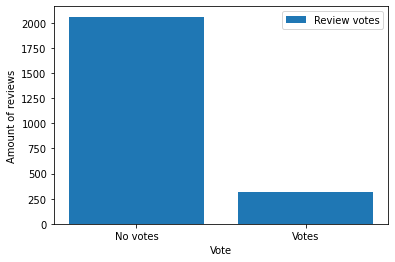

In [12]:
votes = df["vote"].value_counts()
no_votes = votes[0].sum()
has_votes = votes[1:].sum()
plt.bar(["No votes", "Votes"], [no_votes, has_votes])
plt.ylabel("Amount of reviews")
plt.xlabel("Vote")
plt.legend(["Review votes"])

In [13]:
bins = list(range(1, 50 + 25, 10))  # [1, 11, 21, 31, 41, 51, 61, 71]


def split_by_ratings(data: pd.DataFrame) -> list[list]:
    split_data = []
    for rating in range(5, 0, -1):
        single_rating_votes = df.loc[df.rating == rating]["vote"]
        binned = single_rating_votes.value_counts(bins=bins)
        split_data.append(binned.to_list())
    return split_data


split_by_ratings(df)

[[107, 5, 2, 1, 1, 1, 0],
 [48, 2, 1, 1, 1, 0, 0],
 [30, 3, 0, 0, 0, 0, 0],
 [24, 1, 1, 0, 0, 0, 0],
 [73, 7, 2, 1, 1, 0, 0]]

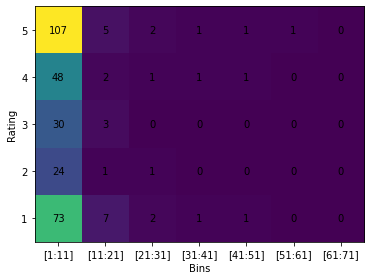

In [14]:
heatmap = np.array(split_by_ratings(df))

bin_labels = [
    "[1:11]",
    "[11:21]",
    "[21:31]",
    "[31:41]",
    "[41:51]",
    "[51:61]",
    "[61:71]",
]
rating_labels = range(5, 0, -1)

fig, ax = plt.subplots()
im = ax.imshow(heatmap)
ax.set_yticks(range(len(rating_labels)), lables="rating")
ax.set_xticks(range(len(bin_labels)), lables="bins")
ax.set_ylabel("Rating")
ax.set_xlabel("Bins")
ax.set_xticklabels(bin_labels)
ax.set_yticklabels(rating_labels)

for i in range(5):
    for j in range(len(bins) - 1):
        text = ax.text(j, i, heatmap[i, j], ha="center", va="center")

fig.tight_layout()
plt.show()